<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Simulacion_de_Sistemas_4_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Simulación
## 4.3.2 Modelo de un proceso de ensamble e inspección

> Dos barras m etálicas de diferente longitud son unidas m ediante un proceso de soldadura
para form ar una barra de m ayor longitud. La longitud del prim er tipo de barra sigue una
distribución uniform e entre 45 y 55 cm . La longitud del segundo tipo de barra sigue
una distribución 4-Erlang con media de 30 cm. Las especificaciones del producto final
son de 80 ± 10 cm. Determ ine el porcentaje de barras fuera de especificación.
Para la solución del ejem plo se requier


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

### 1. Tabla de eventos
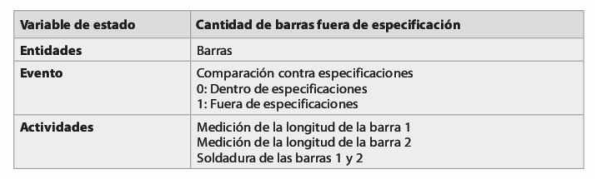

# 2. Relaciones lógico-matemáticas entre elementos.
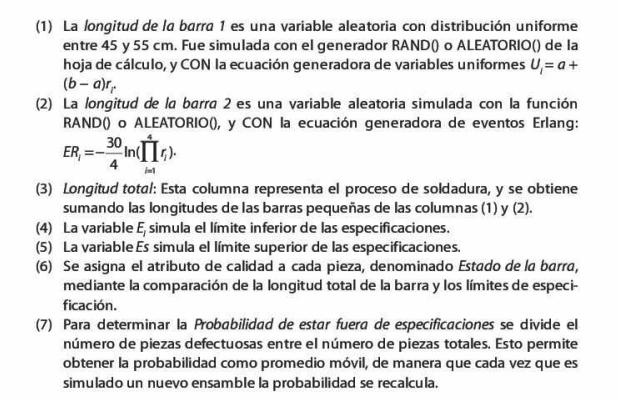

### 2.1 Longitud barra 01



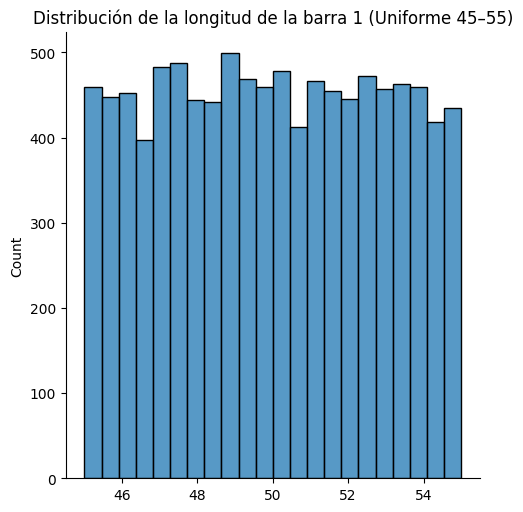

In [15]:
aleatorios1 = np.random.rand(10000)
long_barra1 = 45 + (55 - 45)*aleatorios1

sns.displot(long_barra1)
plt.title("Distribución de la longitud de la barra 1 (Uniforme 45–55)")
plt.show()

### 2.2 Longitud barra 2



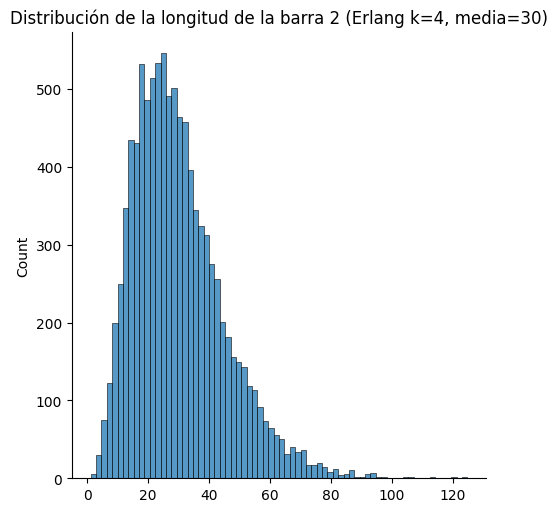

In [14]:
def erlang_k4(mean=30):
    theta = mean / 4
    return sum([-theta*np.log(np.random.rand()) for _ in range(4)])

long_barra2 = np.array([erlang_k4() for _ in range(10000)])

sns.displot(long_barra2)
plt.title("Distribución de la longitud de la barra 2 (Erlang k=4, media=30)")
plt.show()

## 3. Simulación del proceso (1000 ensambles)

Probabilidad final estimada: 0.516


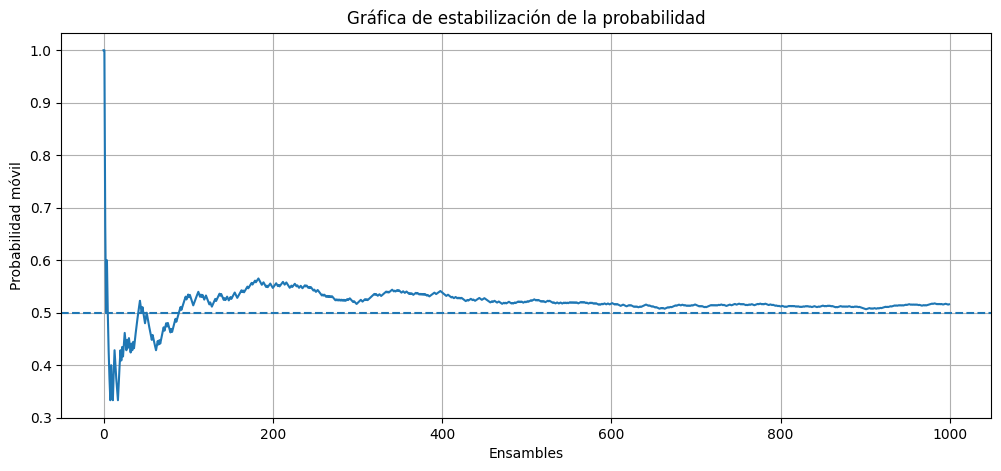

In [22]:
N = 1000

barra1 = 45 + (55-45)*np.random.rand(N)
barra2 = np.array([erlang_k4() for _ in range(N)])
long_total = barra1 + barra2

Ei = 70
Es = 90

estado = np.where((long_total < Ei) | (long_total > Es), 1, 0)
prob_movil = np.cumsum(estado) / np.arange(1, N+1)

print("Probabilidad final estimada:", prob_movil[-1])

plt.figure(figsize=(12,5))
plt.plot(prob_movil)
plt.axhline(0.5, linestyle="--")
plt.grid(True)
plt.title("Gráfica de estabilización de la probabilidad")
plt.xlabel("Ensambles")
plt.ylabel("Probabilidad móvil")
plt.show()


## DataFrame de resultados


In [24]:
import pandas as pd

df = pd.DataFrame({
    "Ensamble": np.arange(1, N+1),
    "Longitud barra 1 (cm)": barra1,
    "Longitud barra 2 (cm)": barra2,
    "Longitud total (cm)": long_total,
    "Ei": [Ei]*N,
    "Es": [Es]*N,
    "Estado de la barra": estado.astype(float),
    "Probabilidad": prob_movil
})

df.head(12)   # Muestra los primeros 12 como en el libro


,Ensamble,Longitud barra 1 (cm),Longitud barra 2 (cm),Longitud total (cm),Ei,Es,Estado de la barra,Probabilidad
0,1,49.840362,18.730350,68.570712,70,90,1.0,1.000000
1,2,49.324809,7.190443,56.515252,70,90,1.0,1.000000
2,3,52.473129,24.884895,77.358024,70,90,0.0,0.666667
3,4,51.410785,26.652393,78.063177,70,90,0.0,0.500000
4,5,46.262033,19.103774,65.365807,70,90,1.0,0.600000
5,6,46.627001,25.211179,71.838180,70,90,0.0,0.500000
6,7,52.686204,27.149602,79.835806,70,90,0.0,0.428571
7,8,51.943623,19.135482,71.079104,70,90,0.0,0.375000
8,9,45.771863,33.099567,78.871430,70,90,0.0,0.333333
9,10,54.839353,42.019103,96.858456,70,90,1.0,0.400000


## 4. Replicas

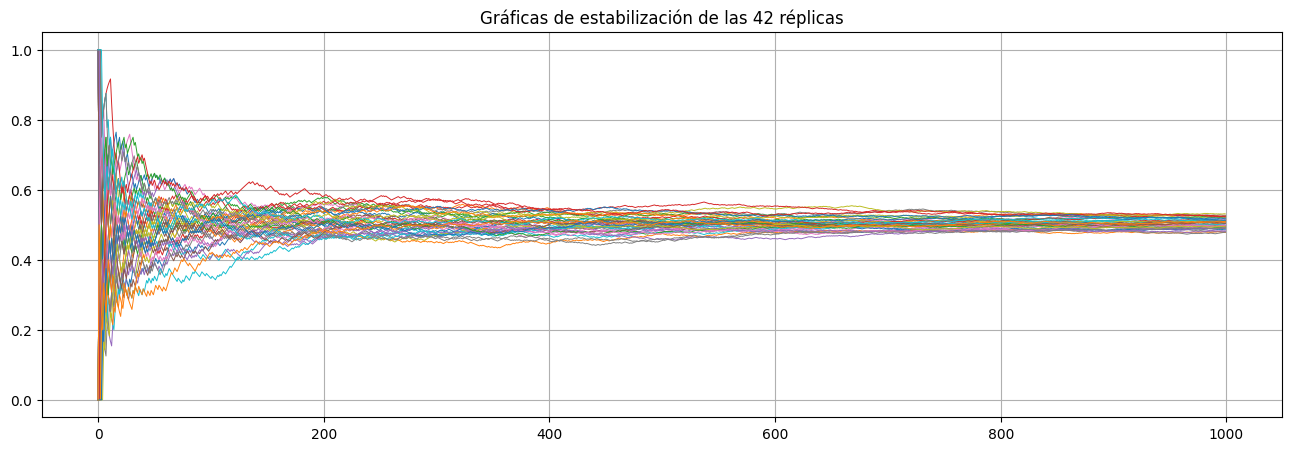

In [27]:
def simular_replica(N=1000):
    b1 = 45 + (55-45)*np.random.rand(N)
    b2 = np.array([erlang_k4() for _ in range(N)])
    total = b1 + b2
    Einf = 70
    Esup = 90
    est = np.where((total < Einf) | (total > Esup), 1, 0)
    prob = np.mean(est)
    return prob, np.cumsum(est)/np.arange(1, N+1)

num_replicas = 42
replicas_valores = []
curvas = []

plt.figure(figsize=(16,5))
for r in range(num_replicas):
    p, curva = simular_replica()
    replicas_valores.append(p)
    curvas.append(curva)
    plt.plot(curva, linewidth=0.7)
plt.title("Gráficas de estabilización de las 42 réplicas")
plt.grid(True)
plt.show()

## Histogramna

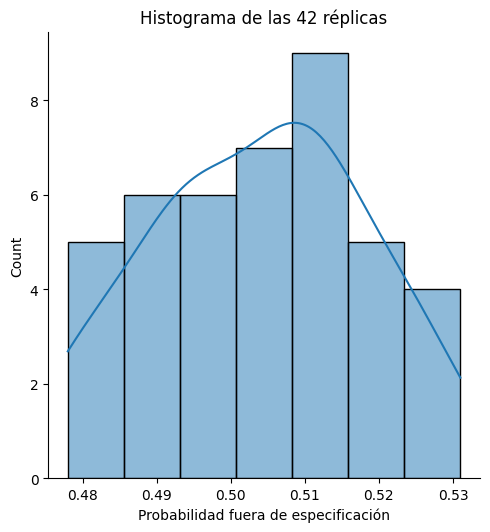

In [28]:
sns.displot(replicas_valores, kde=True)
plt.title("Histograma de las 42 réplicas")
plt.xlabel("Probabilidad fuera de especificación")
plt.show()

In [31]:
from scipy.stats import skew, kurtosis

media = np.mean(replicas_valores)
desv = np.std(replicas_valores)
ic_inf = media - 1.96*(desv/np.sqrt(num_replicas))
ic_sup = media + 1.96*(desv/np.sqrt(num_replicas))
valor_min = np.min(replicas_valores)
valor_max = np.max(replicas_valores)
asim = skew(replicas_valores)
kur = kurtosis(replicas_valores)

print("ANÁLISIS ESTADÍSTICO FINAL")
print("Media: ", media)
print("Desviación estándar: ", desv)
print("Intervalo de confianza 95%:", (ic_inf, ic_sup))
print("Valor mínimo:", valor_min)
print("Valor máximo:", valor_max)
print("Asimetría (skewness):", asim)
print("Curtosis:", kur)


ANÁLISIS ESTADÍSTICO FINAL
Media:  0.5038571428571429
Desviación estándar:  0.014089123512857163
Intervalo de confianza 95%: (np.float64(0.49959610490325834), np.float64(0.5081181808110274))
Valor mínimo: 0.478
Valor máximo: 0.531
Asimetría (skewness): -0.08343745152051683
Curtosis: -0.8557067968380414
